- **Name:** John Paul A. Sergida
- **Term:** AY 2024-2025

# Problem Set 003: Newton-Raphson Method

Let $f(x)$ be a smooth and continuous function and $x_r$ be an unknown root of $f(x)$. Now assume that $x_0$ is a guess for $x_r$. Unless $x_0$ is a very lucky guess, $f(x_0)$ will not be a root. Given this scenario, we want to find an $x_1$ that is an improvement on $x_0$ (i.e., closer to $x_r$ than $x_0$). If we assume that $x_0$ is "close enough" to $x_r$, then we can improve upon it by taking the linear approximation of $f(x)$ around $x_0$, which is a line, and finding the intersection of this line with the x-axis. Written out, the linear approximation of $f(x)$ around $x_0$ is $f(x) \approx f(x_0) + f^{\prime}(x_0)(x-x_0)$. Using this approximation, we find $x_1$ such that $f(x_1) = 0$. Plugging these values into the linear approximation results in the equation

$$
0 = f(x_0) + f^{\prime}(x_0)(x_1-x_0),
$$
which when solved for $x_1$ is
$$
x_1 = x_0 - \frac{f(x_0)}{f^{\prime}(x_0)}.
$$

An illustration of how this linear approximation improves an initial guess is shown in the following figure.
 
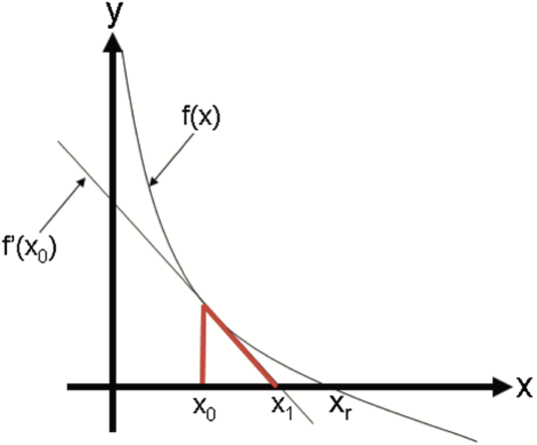

Written generally, a **Newton step** computes an improved guess, $x_i$, using a previous guess $x_{i-1}$, and is given by the equation

$$
x_i = x_{i-1} - \frac{g(x_{i-1})}{g^{\prime}(x_{i-1})}.
$$

The **Newton-Raphson Method** of finding roots iterates Newton steps from $x_0$ until the error is less than the tolerance.

**TRY IT!** Compute the root of the function $f(x) = e^{-x} - x$ using *f_solve*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
f = lambda x: np.exp(-x) - x

x_root = fsolve(f, 0.5)[0]  # Initial guess of 0.5
print("Root: " + str(x_root))

Root: 0.5671432904097811


We know that this function has one root $x = 0.56714329$, therefore, we can get the root out fairly simple using the *f_solve* function. 

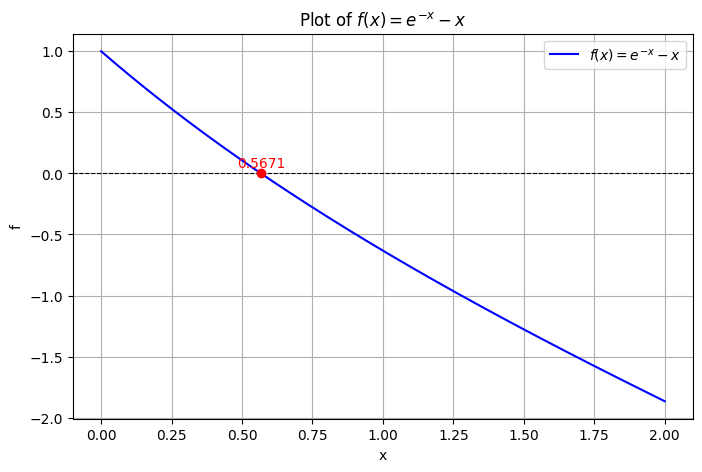

In [5]:
# Plot the function
x = np.linspace(0, 2, 500)
y = np.exp(-x) - x

plt.figure(figsize=(8, 5))
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.plot(x, y, label=r'$f(x) = e^{-x} - x$', color='blue')
plt.title("Plot of $f(x) = e^{-x} - x$")
plt.xlabel("x")
plt.ylabel("f")
plt.grid(True)
plt.legend()
plt.scatter(x_root, 0, color='red', zorder=3, label=f'Intersection at x = {x_root:.4f}')
plt.text(x_root, 0.05, f'{x_root:.4f}', ha='center', color='red', fontsize=10)
plt.show()

Let's first try this manually with the function $f(x) = e^{-x} - x$ and its derivative $f'(x) = -e^{-x} - 1$. Define these functions first:

In [7]:
# Define the function and its derivative
def f(x):
    return np.exp(-x) - x

def df(x):
    return -np.exp(-x) - 1

**TRY IT!** Write a function $newton\_raphson\_method(f, df, x0, tol)$, where the output is an estimation of the root of *f*, *f* is a function object $f(x)$, *df* is a function object to $f^{\prime}(x)$, *x0* is an initial guess, and *tol* is the error tolerance. The error measurement should be $|f(x)|$.

In [9]:
def newton_raphson_method(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    iterations = 0
    roots = [x]  # Store intermediate root values
    
    while abs(f(x)) > tol and iterations < max_iter:
        x = x - f(x) / df(x)
        roots.append(x)  # Store each iteration's root
        iterations += 1
    
    return x, iterations, roots

# Example: Find the root using Newton-Raphson
root_newton, iter_newton, roots = newton_raphson_method(f, df, -3)
print(f"Newton-Raphson Method: Root = {root_newton:.6f}, Iterations = {iter_newton}")
for i, r in enumerate(roots):
    print(f"Iteration {i}: Root = {r:.6f}")

Newton-Raphson Method: Root = 0.567143, Iterations = 6
Iteration 0: Root = -3.000000
Iteration 1: Root = -1.905148
Iteration 2: Root = -0.787907
Iteration 3: Root = 0.145789
Iteration 4: Root = 0.531207
Iteration 5: Root = 0.566907
Iteration 6: Root = 0.567143


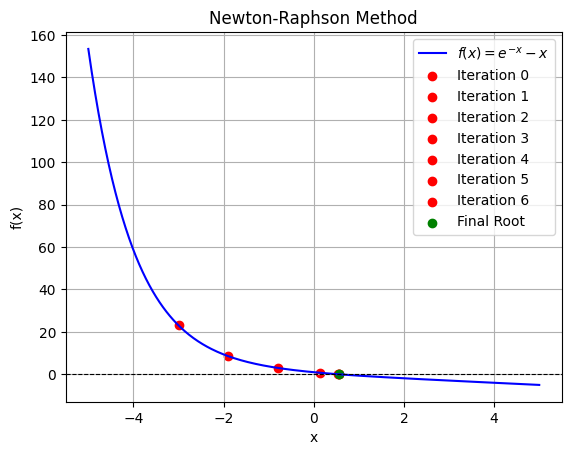

In [11]:
# Plot the function
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label=r'$f(x) = e^{-x} - x$', color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Plot each iteration's root
for i, r in enumerate(roots):
    plt.scatter(r, f(r), color='red', marker='o', label=f'Iteration {i}')

# Highlight final root
plt.scatter(root_newton, f(root_newton), color='green', marker='o', label='Final Root')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson Method')
plt.legend()
plt.grid()
plt.show()

If $x_0$ is close to $x_r$, then it can be proven that, in general, the Newton-Raphson method converges to $x_r$ much faster than the bisection method. However since $x_r$ is initially unknown, there is no way to know if the initial guess is close enough to the root to get this behavior unless some special information about the function is known *a priori* (e.g., the function has a root close to $x = 0$). In addition to this initialization problem, the Newton-Raphson method has other serious limitations. For example, if the derivative at a guess is close to 0, then the Newton step will be very large and probably lead far away from the root. Also, depending on the behavior of the function derivative between $x_0$ and $x_r$, the Newton-Raphson method may converge to a different root than $x_r$ that may not be useful for our engineering application.